# **Prediction of the price of First Majestic Stock**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_style('whitegrid')
%matplotlib inline

In [46]:
import yfinance as yf
#from yf import YahooFinancials

In [47]:
# Setting time period for which stock price would be collected 
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [56]:
stock_list = ['FR.TO']

In [67]:
# Useful if I have more than one stock
for stock in stock_list:
    globals()[stock] = yf.download(stock, 
                       start=start, 
                       end=end, 
                       progress=False,
                       group_by = 'ticker')

In [177]:
# Stock Dataframe
FR = globals()['FR.TO']
#FR.head()

#### Calculating Moving Average

In [145]:
m_avg = 50
column_name = 'Move Avg for %s days' %str(m_avg)
FR[column_name] = FR['Adj Close'].rolling(window = m_avg, center = True).mean()

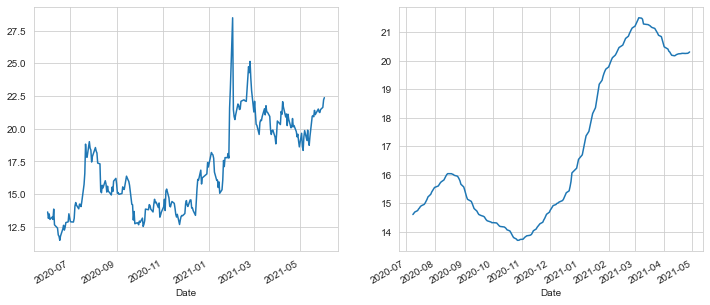

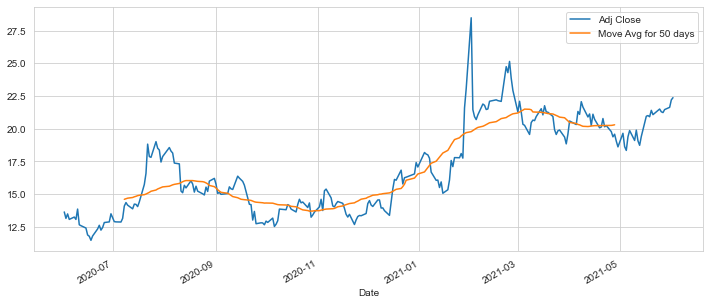

In [167]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#FR[['Adj Close','Move Avg for 50 days']].plot();
FR['Adj Close'].plot(ax = ax[0]);
FR['Move Avg for 50 days'].plot(ax = ax[1]);
FR[['Adj Close','Move Avg for 50 days']].plot(figsize=(12,5));

#### Calculating Daily Return using 'percent change' method

In [147]:
FR['Daily Return'] = FR['Adj Close'].pct_change()

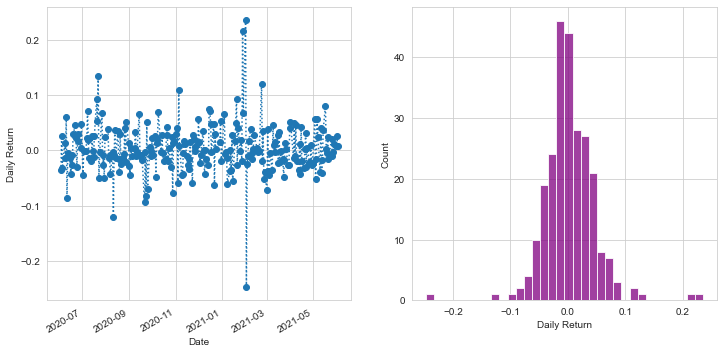

In [183]:
# Using subplots and using the axes objects in two different ways 
fig, ax = plt.subplots(1,2, figsize = (12,6))

FR['Daily Return'].dropna().plot(ax= ax[0], style = [':'], marker = 'o', ylabel = 'Daily Return')
ax[1] = sns.histplot(FR['Daily Return'].dropna(), color ='purple');